In [11]:
#Library 1: Matplotlib
# Dataset 1 (Zillow Dataset): line graph of house indices (y-axis) over time (x-axis) for Virginia and California
# Dataset 2 (Covid Dataset): line graph of Covid cases (y-axis) over time (x-axis) for Virginia and California

#For more imformation on the datasets used, please see our group project proposal! Thank you.

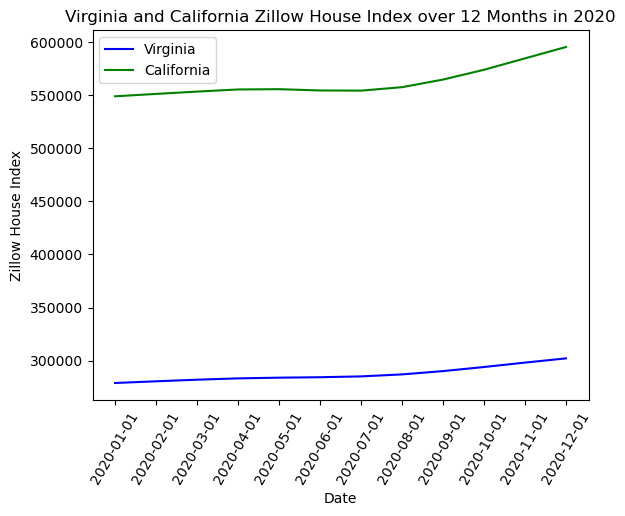

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zillow_df = pd.read_csv('processed_df_1.csv')

plt.plot(zillow_df['Unnamed: 0'], zillow_df['Virginia'], color ='blue', label ='Virginia')
plt.plot(zillow_df['Unnamed: 0'], zillow_df['California'], color ='green', label = 'California')

plt.title('Virginia and California Zillow House Index over 12 Months in 2020')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Zillow House Index')
plt.legend()
plt.show()

#Exploration Observation: I chose 2 states to explore with a line graph though for our project we could include more or all. Both states have rising Zillow House Indices, but California has a much higher baseline. 


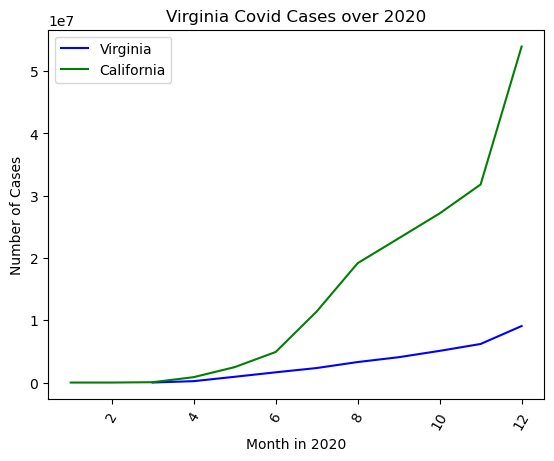

In [7]:
covid_df = pd.read_csv('processed_df_2.csv')

plt.plot(covid_df[covid_df["state"]=="Virginia"]['month'], covid_df[covid_df["state"]=="Virginia"]['cases'], color ='blue', label ='Virginia')
plt.plot(covid_df[covid_df["state"]=="California"]['month'], covid_df[covid_df["state"]=="California"]['cases'], color ='green', label = 'California')

plt.title('Virginia Covid Cases over 2020')
plt.xlabel('Month in 2020')
plt.xticks(rotation=60)
plt.ylabel('Number of Cases')
plt.legend()

plt.show()

#Exploration Observation: Both cases also have rising Covid cases, although California rises much more quickly. This could mean that different states have different rates of rising Covid cases.

In [ ]:
#Library 2: Gapminder
# Dataset 1 (Zillow Dataset): animates over months for each 50 states (x axis) and zillow house index (y axis)
# Dataset 2 (Covid Dataset): animates over months for each 50 states (x axis) and cases (y axis)

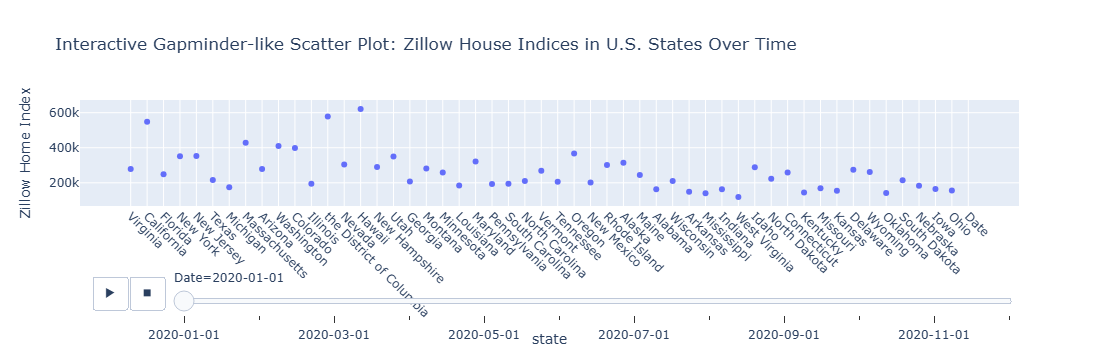

In [9]:
import plotly.express as px
import pandas as pd

# Load the Gapminder-like dataset
gapminder = pd.read_csv('processed_df_1.csv')

gapminder = gapminder.melt(id_vars=['Unnamed: 0'], var_name='state', value_name='Zillow Home Index')

fig = px.scatter(
    gapminder,
    x='state',
    y='Zillow Home Index',
    animation_frame='Unnamed: 0',
    title='Interactive Gapminder-like Scatter Plot: Zillow House Indices in U.S. States Over Time',
    labels={'Unnamed: 0': 'Date'}
)

fig.update_layout(
    xaxis=dict(tickangle=45))
    
fig.show()

#Exploration Observation: Scrolling left to right i.e. moving forward in time, we see the Zillow Home Index of many states rise.


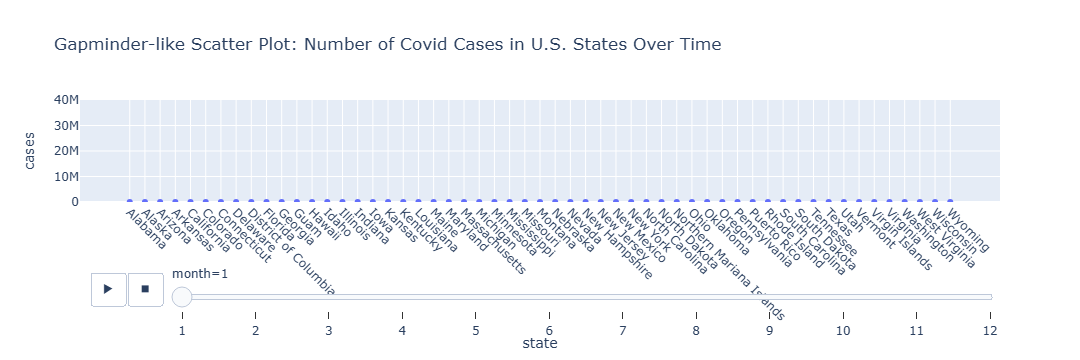

In [11]:
covid_gapminder = pd.read_csv('processed_df_2.csv')

covid_gapminder['month'] = pd.Categorical(
    covid_gapminder['month'],
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ordered=True
)

states = covid_gapminder['state'].unique()
months = covid_gapminder['month'].cat.categories
complete_index = pd.MultiIndex.from_product([states, months], names=['state', 'month'])

covid_gapminder = covid_gapminder.set_index(['state', 'month']).reindex(complete_index).reset_index()
covid_gapminder['cases'] = covid_gapminder['cases'].fillna(0)
covid_gapminder['deaths'] = covid_gapminder['deaths'].fillna(0)

fig = px.scatter(
    covid_gapminder,
    x='state',
    y='cases',
    animation_frame='month',
    title='Gapminder-like Scatter Plot: Number of Covid Cases in U.S. States Over Time',
)

fig.update_layout(
    yaxis=dict(range=[0, 40000000]),
    xaxis=dict(tickangle=45))
    
fig.show()

#Exploration Observation: Scrolling left to right i.e. moving forward in time, we see Covid cases in all of the states rise as well.
